#### Задание 2.2. часть 2
##### Pешить методом Ньютона и сделать оценку сходимости для выбранной области
###### Метод Ньютона (или метод Ньютона-Рафсона) — это итеративный метод для нахождения корней уравнений. Он основан на использовании производной функции для нахождения приближенного значения корня. Для системы уравнений метод Ньютона можно записать в виде: Xn+1=Xn-J^-1(Xn)*F(Xn), где x — вектор переменных, F — вектор функций, J — якобиан (матрица производных).
###### Шаги решения: определение функций, вычисление якобиана, итерации метода Ньютона, оценка сходимости
#### Ход решения задачи
###### Импорт зависимостей 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

###### Определение вводных

In [2]:
a = 1

def f(x):
    x1, x2 = x
    return np.array([
        x1 - np.cos(x2) - 1,
        x2 - np.log(x1 + 1) - a
    ])

###### Определение якобиана с частными производными f1 и f2

In [3]:
def jacobian(x):
    x1, x2 = x
    return np.array([
        [1, np.sin(x2)], 
        [1/(x1 + 1), 1]  
    ])

###### Применим метод Ньютона

In [4]:
def newton_method(x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        J = jacobian(x)
        F = f(x)
        delta = np.linalg.solve(J, -F) 
        x = x + delta
        
        if np.linalg.norm(delta) < tol:
            print(f"Сошлось за {i+1} итераций.")
            return x
    print("Не сошлось.")
    return x


x0 = np.array([1.0, 1.0]) # <- начальное приближение


solution = newton_method(x0)
print("Решение:", solution)

Не сошлось.
Решение: [nan nan]


/tmp/ipykernel_337/1138325025.py:7: RuntimeWarning: invalid value encountered in log
  x2 - np.log(x1 + 1) - a


###### Оценка сходимости и визуализация

/tmp/ipykernel_337/1138325025.py:7: RuntimeWarning: invalid value encountered in log
  x2 - np.log(x1 + 1) - a


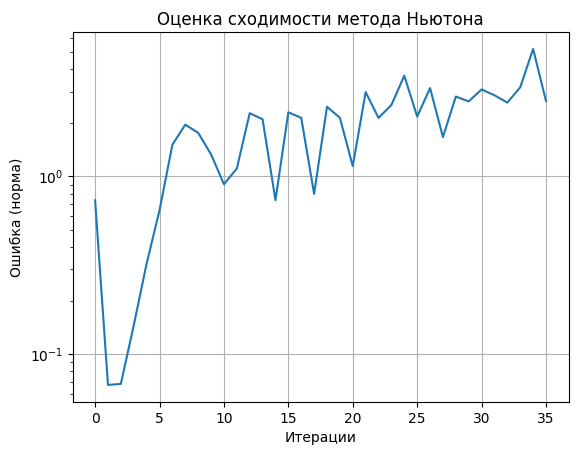

In [5]:
iterations = []
errors = []
x = x0

for i in range(100):
    J = jacobian(x)
    F = f(x)
    delta = np.linalg.solve(J, -F)
    x = x + delta
    iterations.append(i)
    errors.append(np.linalg.norm(delta))


plt.plot(iterations, errors)
plt.yscale('log')
plt.xlabel('Итерации')
plt.ylabel('Ошибка (норма)')
plt.title('Оценка сходимости метода Ньютона')
plt.grid()
plt.show()


###### Результат неудовлетворительный. Попробуем немного поменять подход к решению задачи: будем следить за динамикой на каждой итерации, добавим заглушку nan, поменяем начальное приближение и число итераций
###### Новый формат вводных и якобиан

In [6]:
def f(x):
    x1, x2 = x
    if x1 + 1 <= 0:
        return np.array([np.nan, np.nan])
    return np.array([
        x1 - np.cos(x2) - 1,
        x2 - np.log(x1 + 1) - a
    ])


def jacobian(x):
    x1, x2 = x
    if x1 + 1 <= 0:
        return np.array([[np.nan, np.nan], [np.nan, np.nan]])  
    return np.array([
        [1, np.sin(x2)],  
        [1/(x1 + 1), 1] 
    ])

###### Переопределение метода Ньютона и оценка сходимости

In [8]:
def newton_method(x0, tol=1e-6, max_iter=200): 
    x = x0
    for i in range(max_iter):
        J = jacobian(x)
        F = f(x)
        
        if np.isnan(F).any() or np.isnan(J).any():
            print(f"Итерация {i}: возникли NaN. Текущие значения: x1={x[0]}, x2={x[1]}")
            return None
        
        delta = np.linalg.solve(J, -F) 
        x = x + delta
        
        print(f"Итерация {i}: x1={x[0]}, x2={x[1]}, F(x)={F}, ||delta||={np.linalg.norm(delta)}")
        
        if np.linalg.norm(delta) < tol:
            print(f"Сошлось за {i+1} итераций.")
            return x

        if np.abs(x[0]) > 10 or np.abs(x[1]) > 10:
            print("Значения вышли за пределы допустимого диапазона.")
            return None
            
    print("Не сошлось.")
    return x

x0 = np.array([0.5, 1.0]) 


solution = newton_method(x0)
if solution is not None:
    print("Решение:", solution)


    iterations = []
    errors = []
    x = x0

    for i in range(100):
        J = jacobian(x)
        F = f(x)
        
        if np.isnan(F).any() or np.isnan(J).any():
            break
        
        delta = np.linalg.solve(J, -F)
        x = x + delta
        iterations.append(i)
        errors.append(np.linalg.norm(delta))

    plt.plot(iterations, errors)
    plt.yscale('log')
    plt.xlabel('Итерации')
    plt.ylabel('Ошибка (норма)')
    plt.title('Оценка сходимости метода Ньютона')
    plt.grid()
    plt.show()
else:
    print("Не удалось найти решение.")

Итерация 0: x1=2.092447331662021, x2=0.3438335536668172, F(x)=[-1.04030231 -0.40546511], ||delta||=1.722336468118529
Итерация 1: x1=1.2476113717901836, x2=2.4021561162217986, F(x)=[ 0.15097803 -1.78512924], ||delta||=2.224958330085189
Итерация 2: x1=0.408782913474781, x2=2.183076891104841, F(x)=[0.98645975 0.59228808], ||delta||=0.8669653334232238
Итерация 3: x1=2.0889238975228244, x2=0.15010735231397243, F(x)=[-0.01648186  0.84035074], ||delta||=2.6373924379829186
Итерация 4: x1=1.6728558745716327, x2=2.262519531221394, F(x)=[ 0.10016887 -1.97771542], ||delta||=2.1529974020697087
Итерация 5: x1=0.13384775660552717, x2=2.5589391756047943, F(x)=[1.31072113 0.27937201], ||delta||=1.567294035189937
Итерация 6: x1=1.726619044703559, x2=-0.2791318682750461, F(x)=[-0.03114671  1.43332223], ||delta||=3.2544688700767552
Итерация 7: x1=2.510843141343493, x2=1.7154446238260552, F(x)=[-0.23467594 -2.28219426], ||delta||=2.143208533156084
Итерация 8: x1=-0.5383493854622206, x2=3.1243634142802437, 